<a href="https://colab.research.google.com/github/bubbles42/predicting-product-sales/blob/main/predicting_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Product Sales** 📈

## Author: Austin Weinland

##Project Overview

##Load and Inspect Data

In [ ]:
import pandas as pd
import missingno as msno

fpath = '/content/drive/MyDrive/Coding Dojo - Data Science & Machine Learning/Data Science Fundamentals/Week 2/Data/sales_predictions_2023.csv'

sales_df = pd.read_csv(fpath)

In [ ]:
sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

How many rows?</br>
8523</br>
How many columns?</br>
12

In [ ]:
# What is each datatype?
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
duplicated_rows = sales_df.duplicated().sum()
duplicated_rows

0

In [ ]:
null_values = sales_df.isna().sum()
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

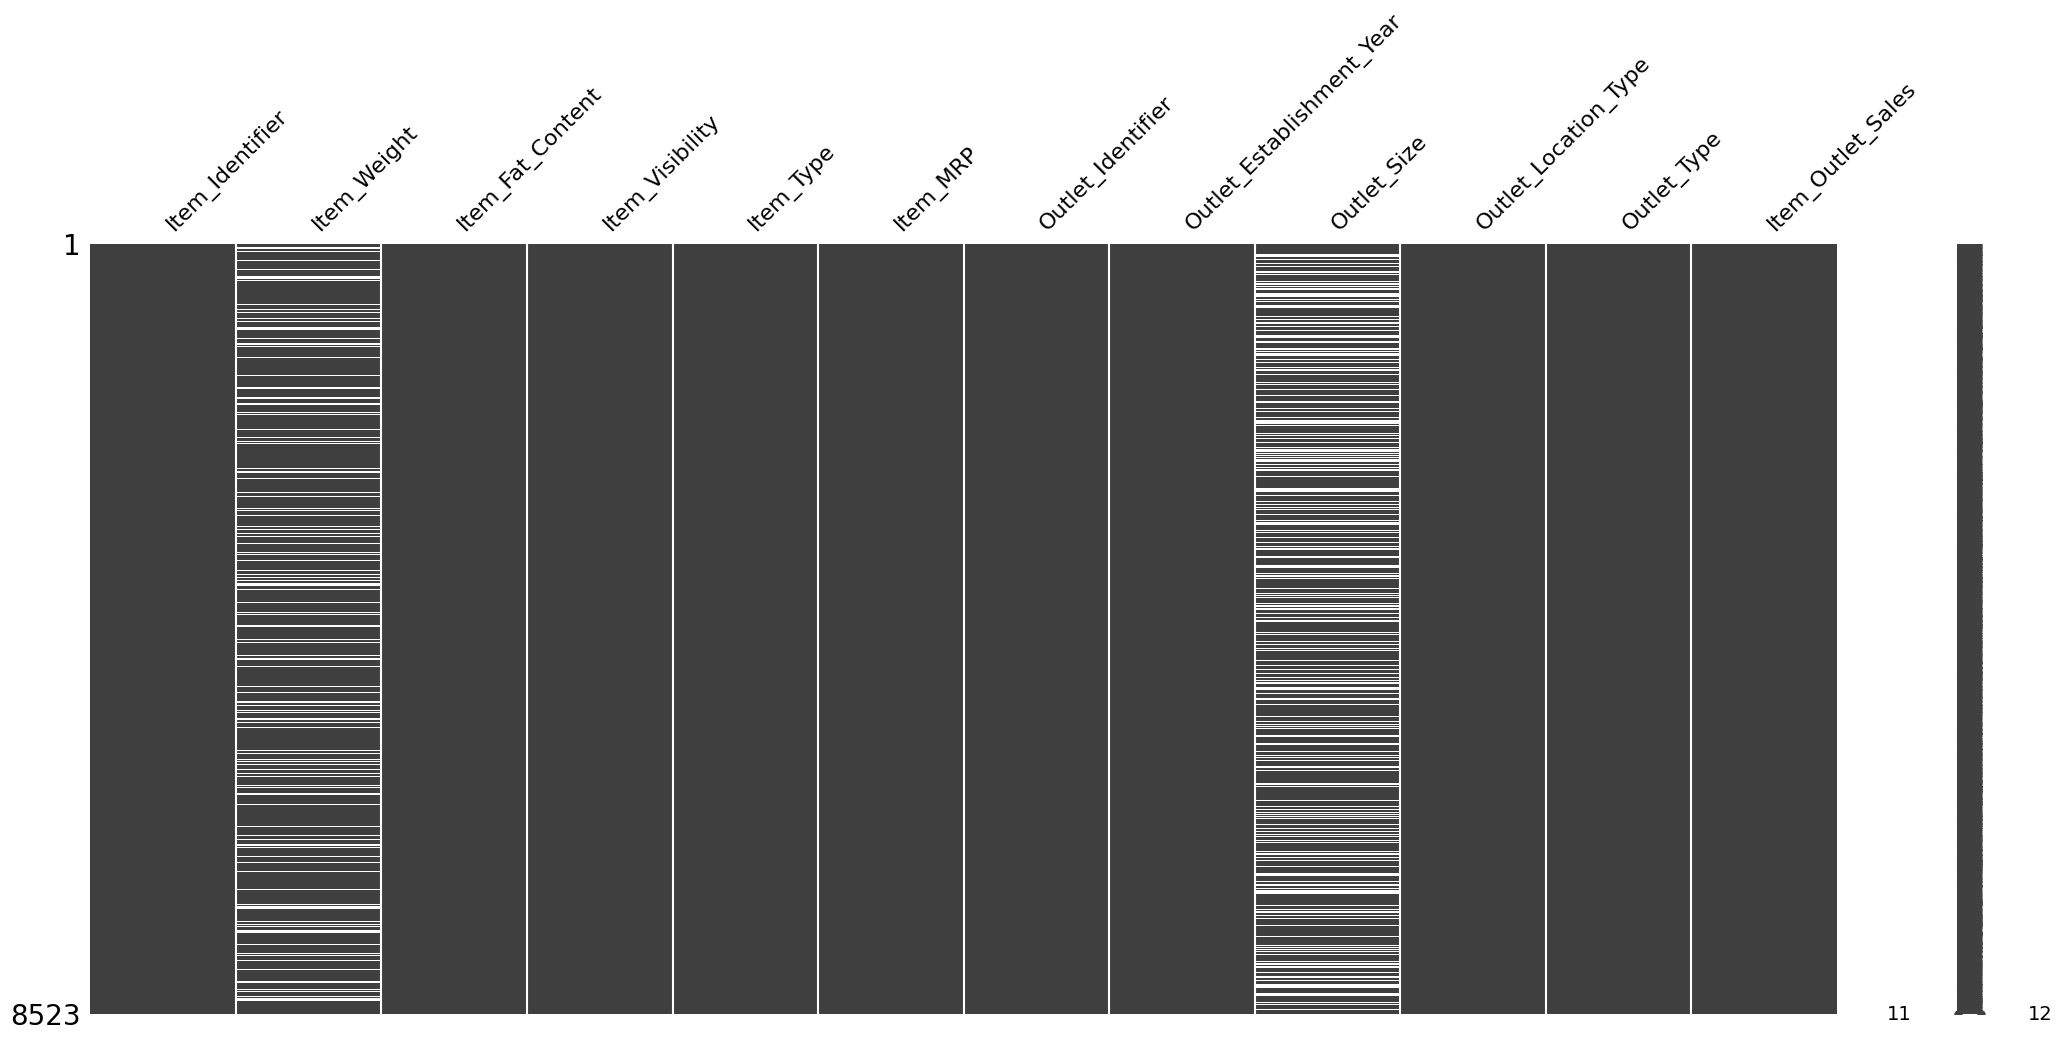

In [ ]:
msno.matrix(sales_df)

In [ ]:
null_weight = sales_df[sales_df['Item_Weight'].isna()]
null_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
sales_df['Item_Weight'].fillna(-1, inplace=True)
sales_df['Item_Weight'].isna().sum()

0

In [ ]:
sales_df['Outlet_Size'].fillna('Unknown', inplace=True)
sales_df['Outlet_Size'].isna().sum()

0

In [ ]:
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
obj_cols = sales_df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols = sales_df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
for col in obj_cols:
  print(f'Value counts for {col}')
  print(sales_df[col].value_counts())
  print('\n')

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
for col in num_cols:
  print(f'Value counts for {col}')
  print(sales_df[col].value_counts())
  print('\n')

Value counts for Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64


Value counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value counts for Item_Outlet_Sales
958.7520     17
134

In [ ]:
sales_df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


####Histograms

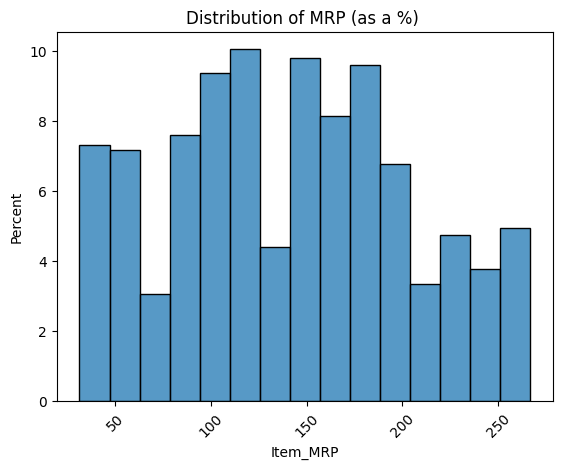

In [ ]:
ax = sns.histplot(data=sales_df, x='Item_MRP', stat='percent', bins=15)
ax.tick_params(axis='x', rotation = 45)
ax.set(title='Distribution of MRP (as a %) ');

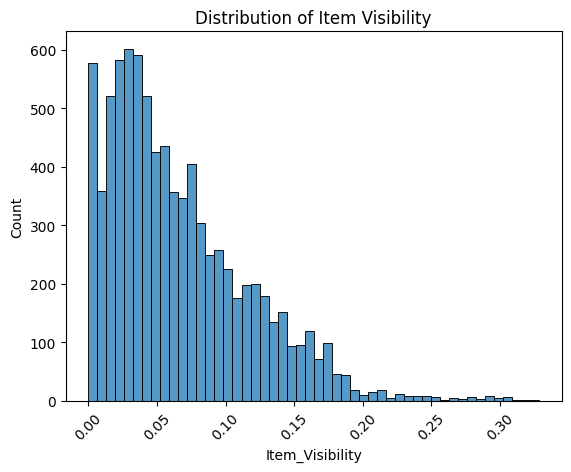

In [ ]:
ax = sns.histplot(data=sales_df, x='Item_Visibility')
ax.tick_params(axis='x', rotation = 45)
ax.set(title='Distribution of Item Visibility');

####Boxplots

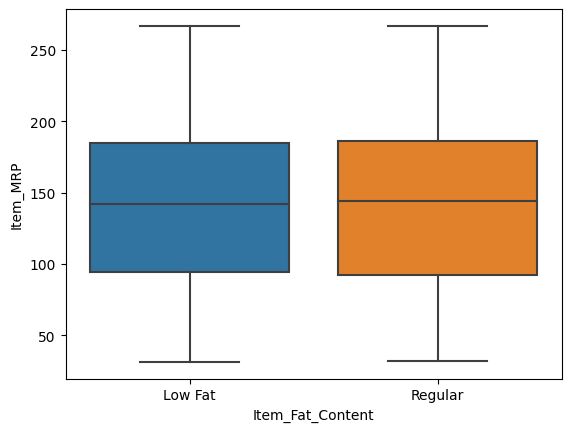

In [ ]:
ax = sns.boxplot(data=sales_df, x='Item_Fat_Content', y='Item_MRP')

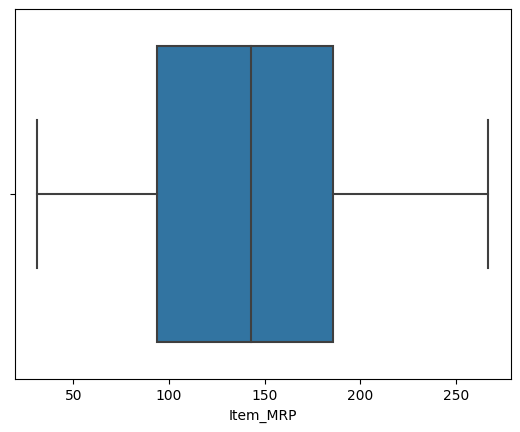

In [ ]:
ax = sns.boxplot(data=sales_df, x='Item_MRP')

####Countplots

In [ ]:
sales_df[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           8523 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


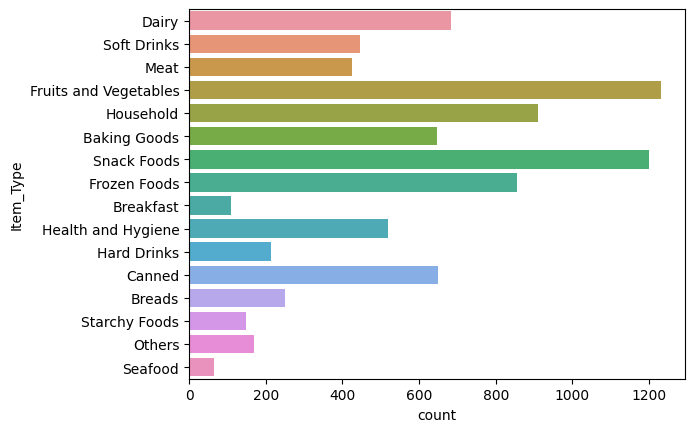

In [ ]:
ax = sns.countplot(
    data=sales_df,
    y='Item_Type',
)

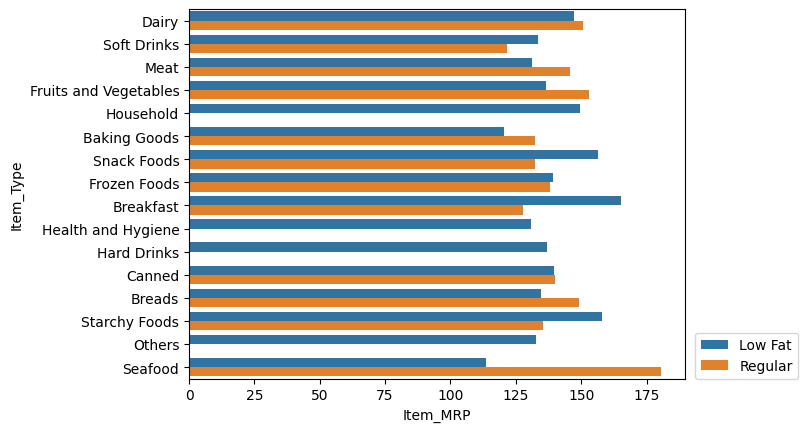

In [ ]:
ax = sns.barplot(
    data=sales_df,
    y='Item_Type',
    x='Item_MRP',
    hue='Item_Fat_Content',
    errorbar=None
)
ax.legend(loc=(1.02,0))

####Heatmap

In [ ]:
corr = sales_df.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


[Text(0.5, 1.0, 'Correlation of Numeric Columns')]

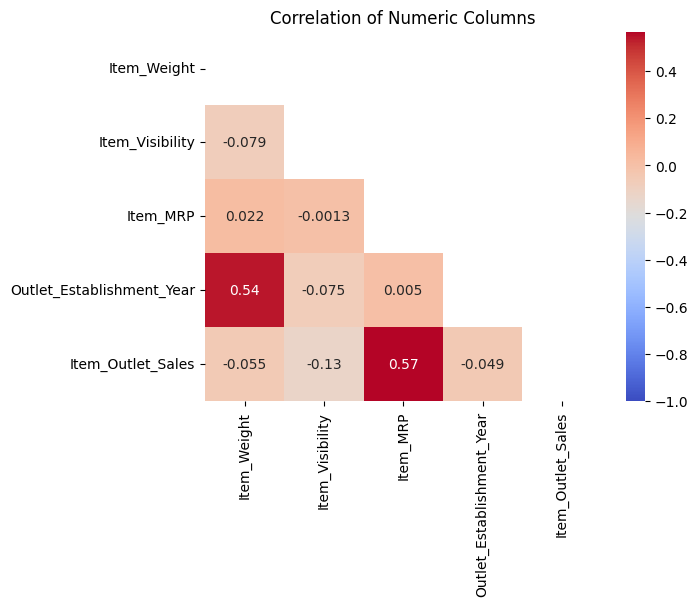

In [ ]:
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, vmin=-1, annot=True, cmap='coolwarm', mask=mask)
ax.set(title='Correlation of Numeric Columns')

##Feature Inspection

In [104]:
sales_df['Item_Weight'] = sales_df['Item_Weight'].replace(-1, np.nan)
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].replace('Unknown', np.nan)

In [105]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Creating EDA Functions

In [ ]:
# Explore Categorical vs Target
def plot_cat_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4),
                       fillna=True, placeholder='MISSING',
                       order=None):

  temp_df = df.copy()
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  else:
    temp_df = temp_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)

  sns.barplot(data=temp_df, x=x, y=y, ax=ax,
              order=order, alpha=0.6, linewidth=1, edgecolor='k', errorbar=None)

  sns.stripplot(data=temp_df, x=x, y=y, ax=ax, hue=x, order=order,
                hue_order=order, legend=False, edgecolor='white',
                linewidth=0.5, size=3, zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set(title=f'{x} vs. {y}')
  fig.tight_layout()
  return fig, ax


#Explore Numeric vs Target
def plot_num_to_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs):
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  fig, ax = plt.subplots(figsize=figsize)
  sns.regplot(data=df,
              x=x,
              y=y,
              scatter_kws={'ec':"white", 'lw':1, 'alpha':0.8},
              **kwargs,
              ax=ax
  )
  ax.set(title=f'{x} vs. {y} (r = {r})')
  fig.tight_layout()
  return fig, ax
  plt.show();

In [ ]:
# Explore 1 Categorical Value
def explore_cat(df, x, placeholder='MISSING', fillna=True,
                figsize=(6,4), order=None):
  temp_df = df.copy()
  #Before filling the NA values set them as a subset with a variable
  null_count = temp_df[x].isna().sum()
  null_pct = null_count / len(temp_df) *100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  ax = sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set(title=f'Column: {x}')
  fig.tight_layout()
  plt.show()

  #Print null value info
  print(f" - NaN's Found: {null_count} ({round(null_pct,2)}%)")
  #Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  #Find value counts of features
  val_counts = temp_df[x].value_counts(dropna=False)
  #Define most common value
  most_comm = val_counts.index[0]
  #Define frequency of most common value
  freq = val_counts.values[0]
  #Calculate the percent of most comm
  pct_most_comm = freq / len(temp_df) * 100
  #Print the results
  print(f"- Most common value: '{most_comm}' occurs {freq} times\
   ({round(pct_most_comm,2)}%)")
  #Print the constant warning
  if pct_most_comm > 98:
    print(f" [!] Warning: '{x}'\
     is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"'{x}' is not a constant or quasi-contant.")
  return fig, ax


# Explore 1 Numeric Value
def explore_num(df, x, figsize=(6,5)):
  gridspec = {'height_ratios':[0.7,0.3]}

  temp_df = sales_df.copy()
  null_count = temp_df[x].isna().sum()
  null_pct = null_count / len(temp_df) *100

  fig, axes = plt.subplots(nrows=2,
                           figsize=figsize,
                           gridspec_kw=gridspec,
                           sharex=True
  )
  sns.histplot(data=df, x=x, ax=axes[0])
  sns.boxplot(data=df, x=x, ax=axes[1])
  ax.set(title=f'Column: {x}')
  fig.tight_layout();

  #Print null value info
  print(f" - NaN's Found: {null_count} ({round(null_pct,2)}%)")
  #Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  #Find value counts of features
  val_counts = temp_df[x].value_counts(dropna=False)
  #Define most common value
  most_comm = val_counts.index[0]
  #Define frequency of most common value
  freq = val_counts.values[0]
  #Calculate the percent of most comm
  pct_most_comm = freq / len(temp_df) * 100
  #Print the results
  print(f"- Most common value: '{most_comm}' occurs {freq} times\
   ({round(pct_most_comm,2)}%)")
  #Print the constant warning
  if pct_most_comm > 98:
    print(f" [!] Warning: '{x}'\
     is a constant or quasi-constant feature and should be dropped.")
  else:
    print(f"'{x}' is not a constant or quasi-contant.")
  return fig, ax

### 'Item_Identifier' Feature

- Item_Identifier: ProductID
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
sales_df[feature].dtype

dtype('O')

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature, figsize=(80,60));

In [ ]:
sales_df['Item_Identifier'].duplicated().sum()

6964

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - very high 1559 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no we need the product id to id the product we are trying to predict sales for



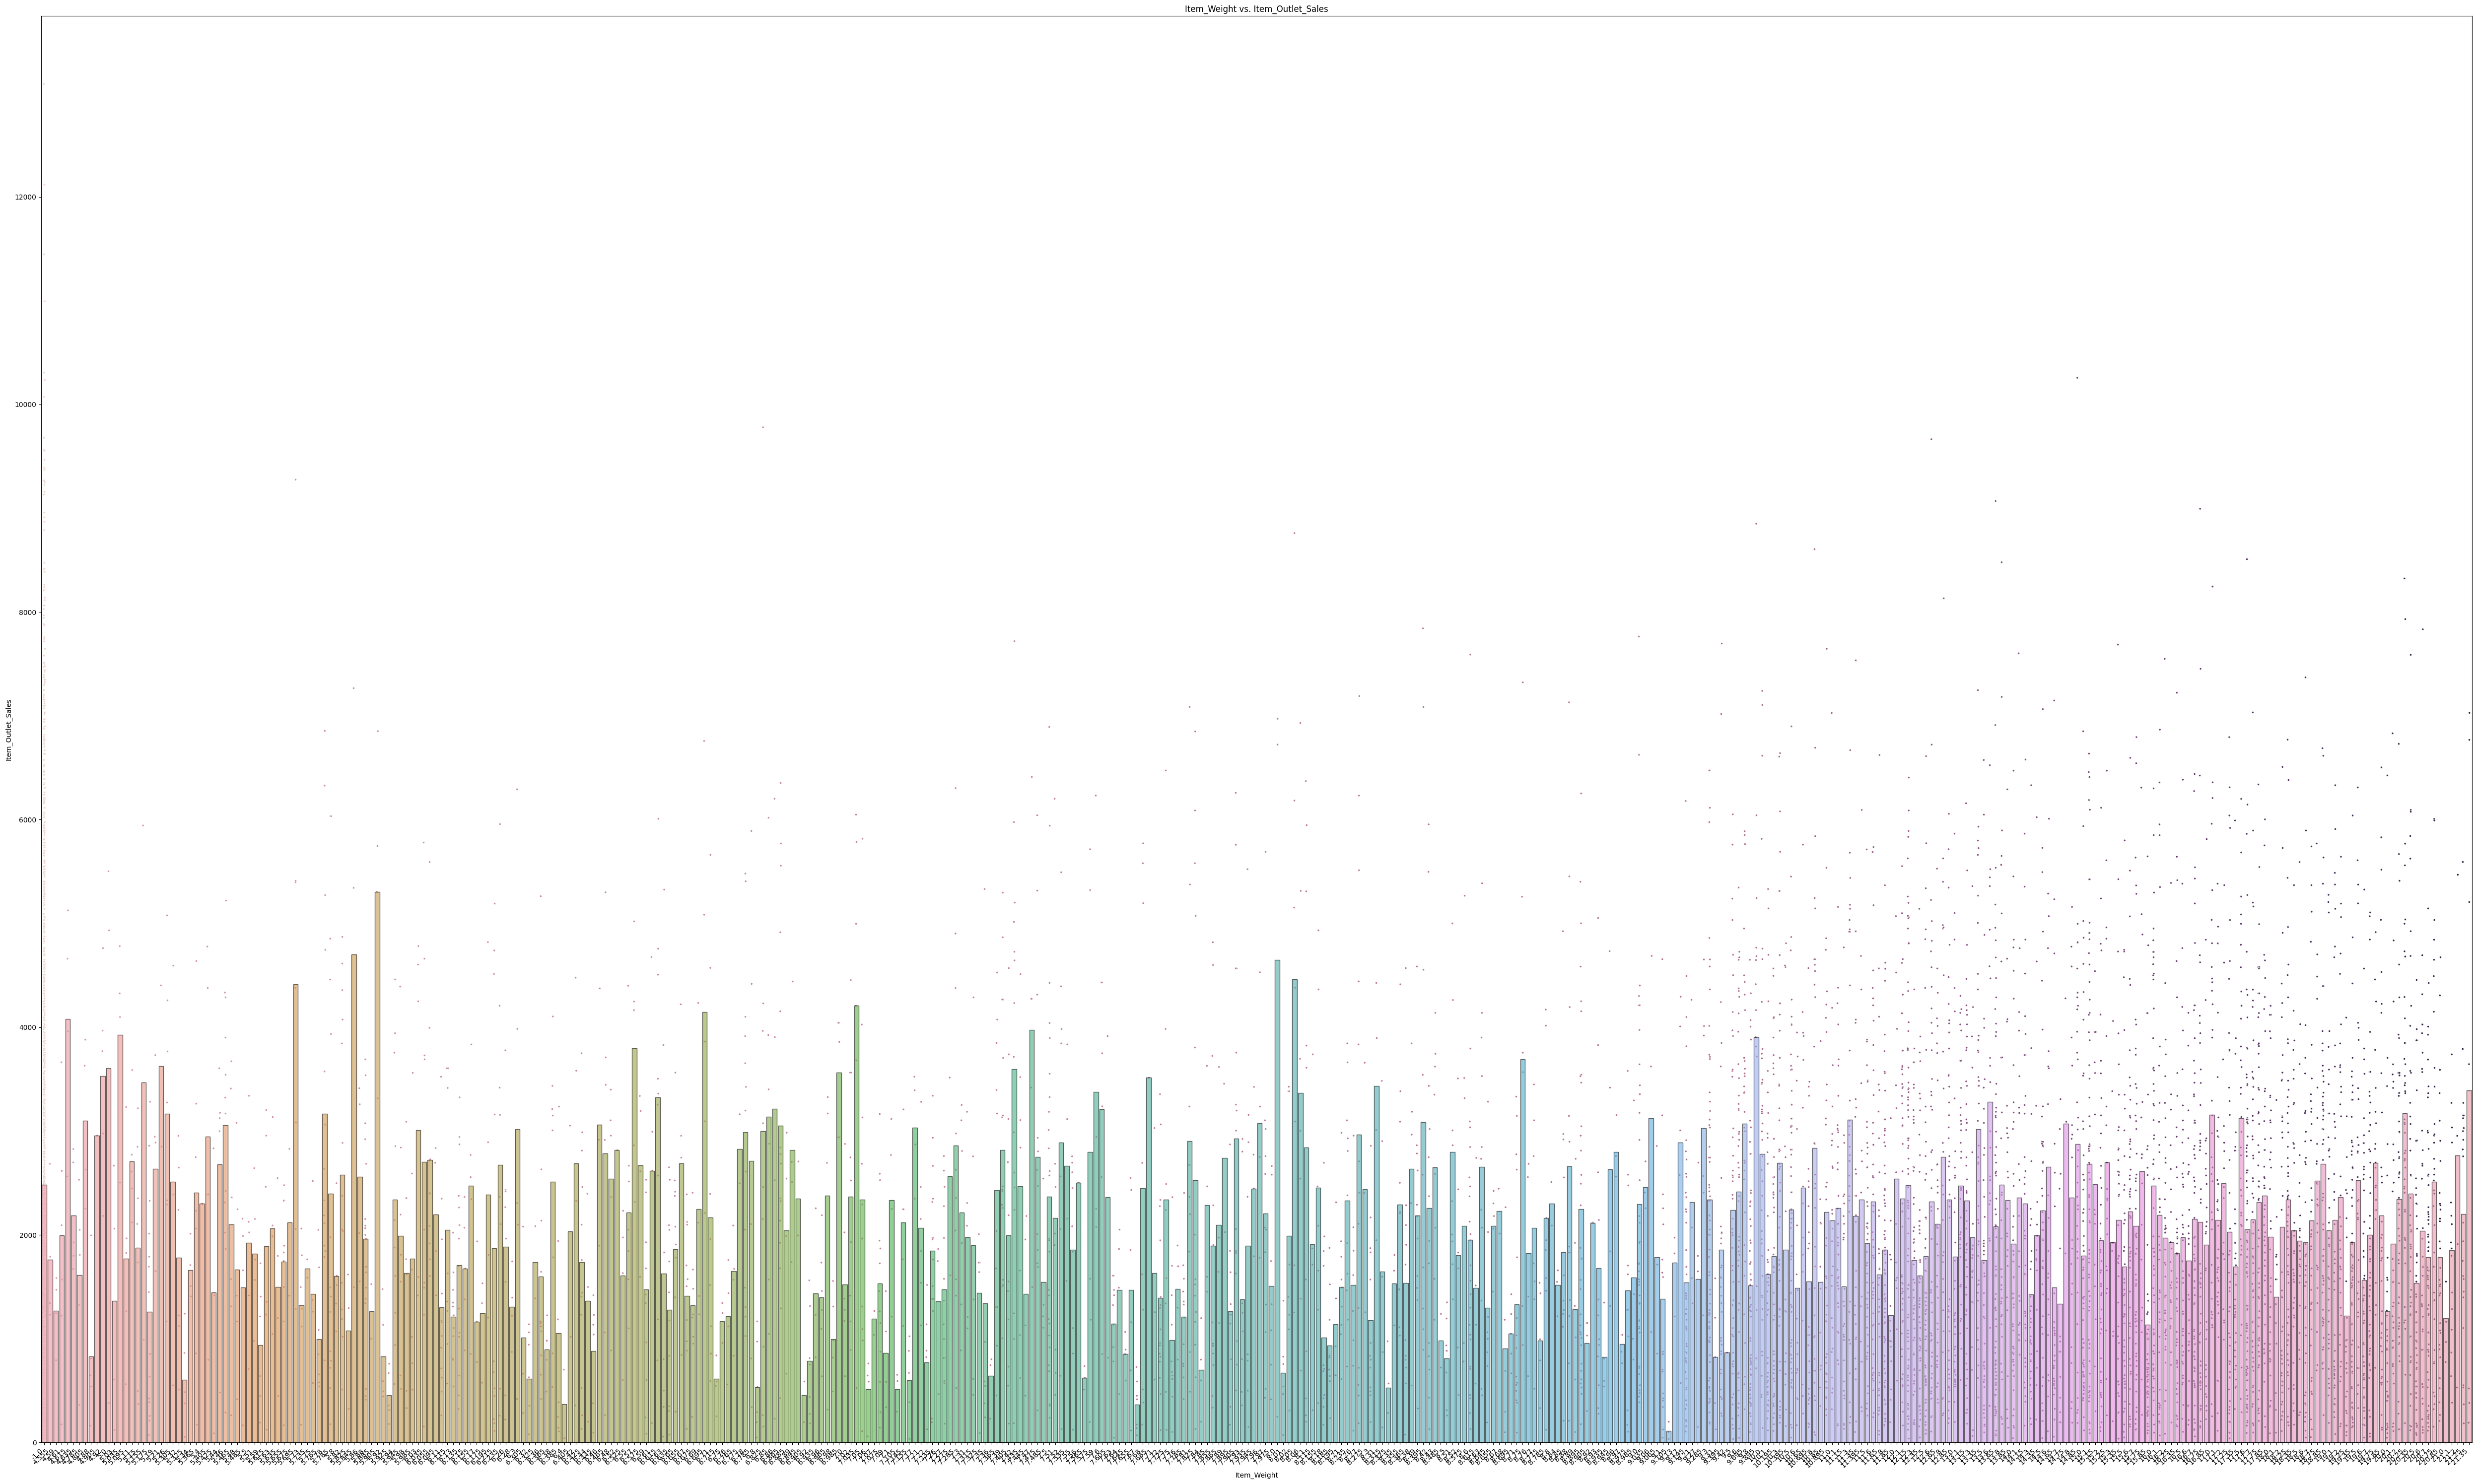

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature, figsize=(50,30));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - i would expect certain procduct ids to have higher sales than others.
  - Does this feature appear to be a predictor of the target?
    - this feature will be a direct correlation to the taret of product sales
___

### 'Item_Weight' Feature

- Item_Weight: weight of product

  

In [106]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
sales_df[feature].dtype

dtype('float64')

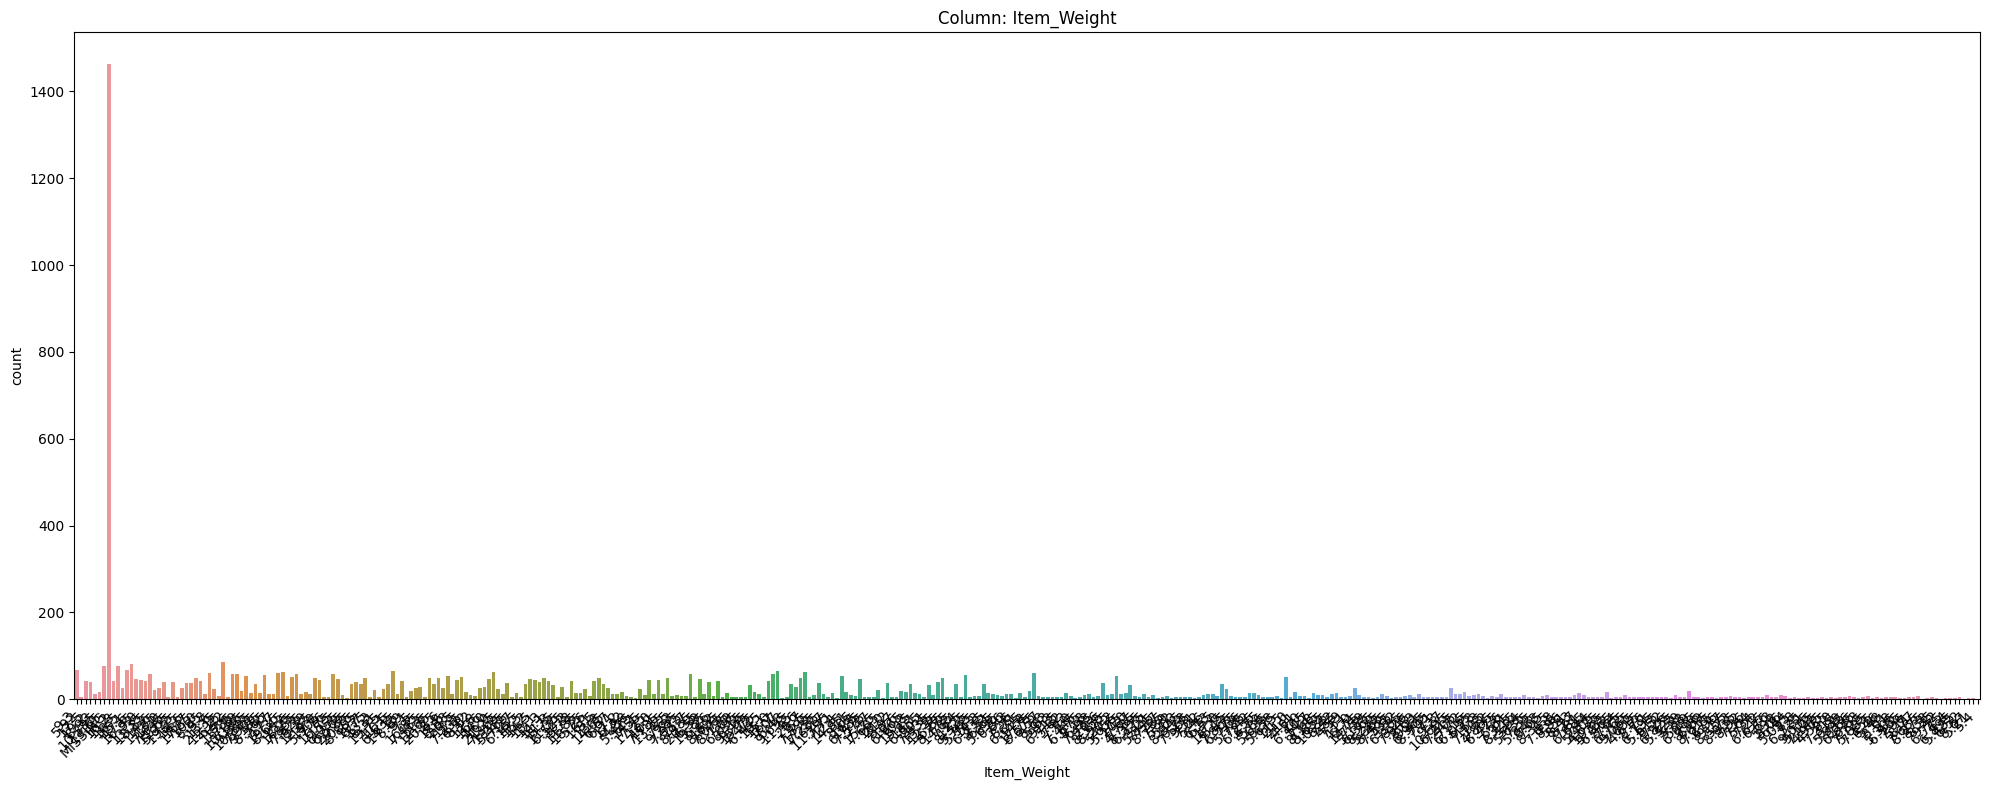

 - NaN's Found: 1463 (17.17%)
- Unique Values: 416
- Most common value: 'MISSING' occurs 1463 times   (17.17%)
'Item_Weight' is not a constant or quasi-contant.


In [107]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature, figsize=(20,8));

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%), fill in with the median

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - n/a

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no


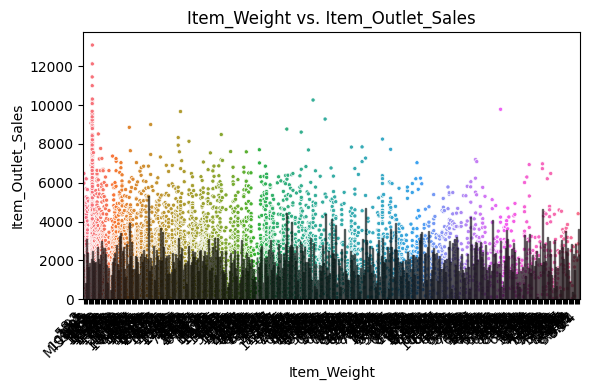

In [108]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - for some items like food items, or travel items i could see this being a factor in sales
  - Does this feature appear to be a predictor of the target?
    - yes, there is varability between the different weight and sales.

___

### 'Item_Fat_Content' Feature

- Item_Fat_Content: Whether the product is low-fat or regular
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
sales_df[feature].dtype

dtype('O')

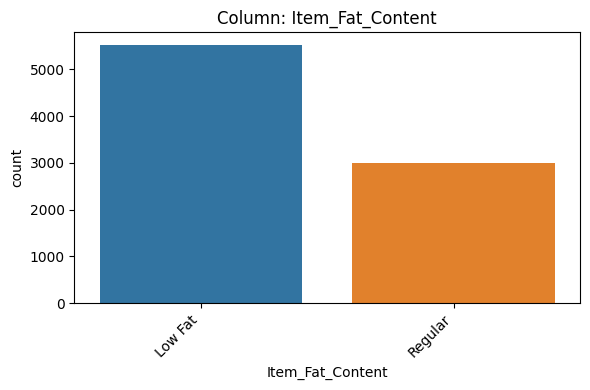

 - NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times   (64.73%)
'Item_Fat_Content' is not a constant or quasi-contant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - low, only 2.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, fat content could impact sales



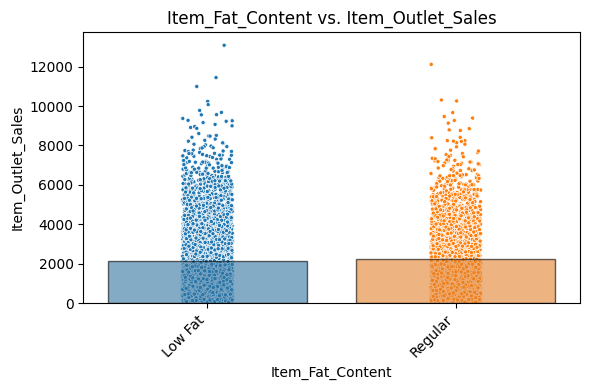

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, it would be expected that based on personal preferance the low or regualr fat sales would be impacted
  - Does this feature appear to be a predictor of the target?
    - yes, it appears the low fat has more sales data within out df
___

### 'Item_Visibility' Feature

- The percentage of total display area of all products in a store allocated to the particular producta

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
sales_df[feature].dtype

dtype('float64')

 - NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times   (6.17%)
'Item_Visibility' is not a constant or quasi-contant.


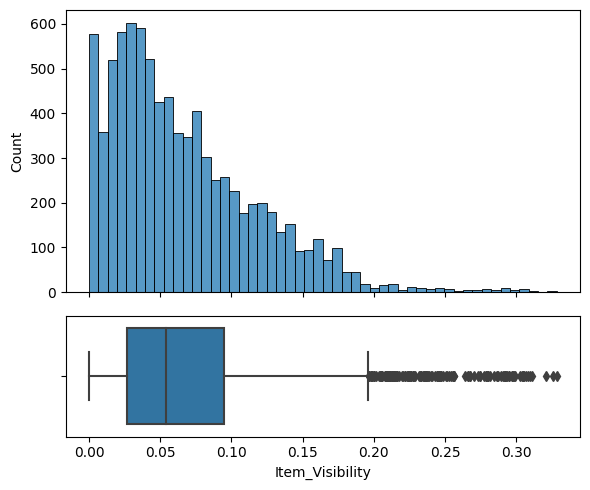

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_num(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - n/a

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, visibility could have a majot impact on sales



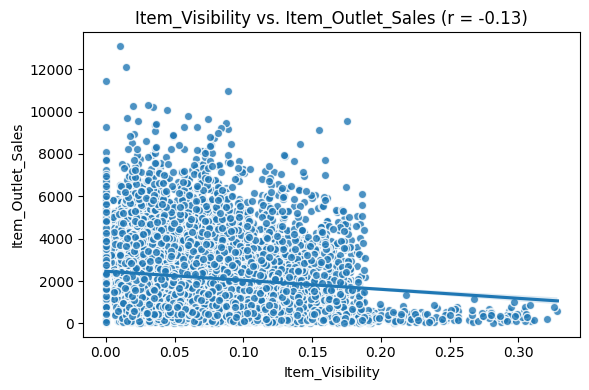

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_num_to_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, it would be expected that more visible items would have higher sales
  - Does this feature appear to be a predictor of the target?
    - yes, but the opposite of my thoughts

___

### 'Item_Type' Feature

- The category to which the product belongs

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
sales_df[feature].dtype

dtype('O')

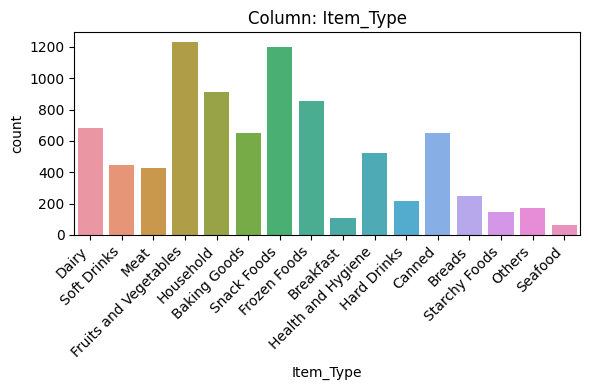

 - NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times   (14.46%)
'Item_Type' is not a constant or quasi-contant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - high, it is above 10 (16).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, item type will directly correlate to sales



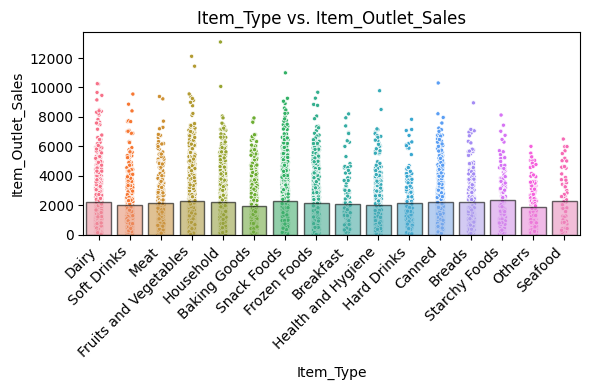

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes, there is slight varability

___

### 'Item_MRP' Feature

- Maximum Retail Price (list price) of the product

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
sales_df[feature].dtype

dtype('float64')

 - NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times   (0.08%)
'Item_MRP' is not a constant or quasi-contant.


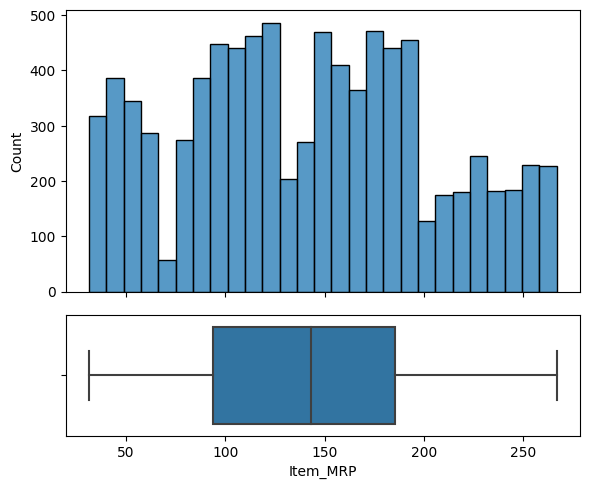

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_num(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - n/a

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


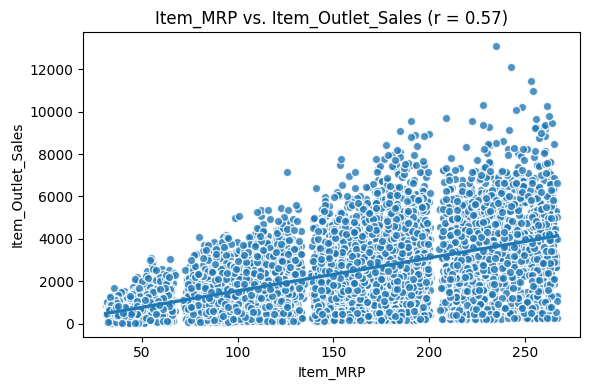

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_num_to_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, this would be dependent on needs/wants and what consumers are buying but there should be a correlation between the two
  - Does this feature appear to be a predictor of the target?
    - yes, it appears there are more sales on higher priced items.

___

### 'Outlet_Identifier' Feature

- Store ID

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
sales_df[feature].dtype

dtype('O')

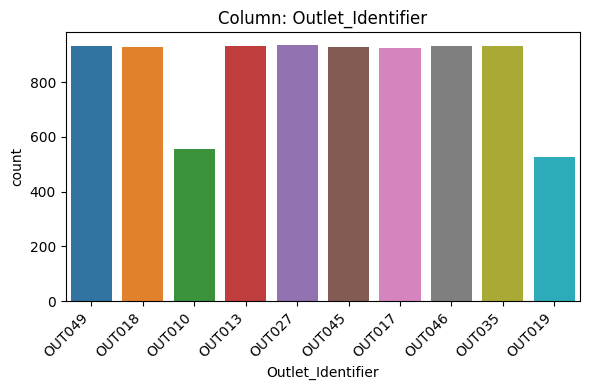

 - NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times   (10.97%)
'Outlet_Identifier' is not a constant or quasi-contant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - high right at 10.

5. Would we know this BEFORE the target is determined?
  - no the item would need to sell before we knew what outlet it sold at, unless the outlet has a product no other outlet has

6. Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, as we would not know the outlet the item sold at until after it was sold



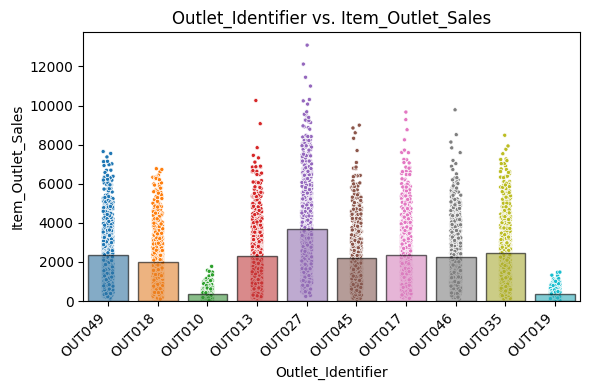

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, i would assume that some outlets would have higher sales than others
  - Does this feature appear to be a predictor of the target?
    - yes, as the outlets are varying in the amount of total sales. However, we would not know where a produt sold until it sold

___

### 'Outlet_Establishment_Year' Feature

- The year in which store was established
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
sales_df[feature].dtype

dtype('int64')

 - NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times   (17.17%)
'Outlet_Establishment_Year' is not a constant or quasi-contant.


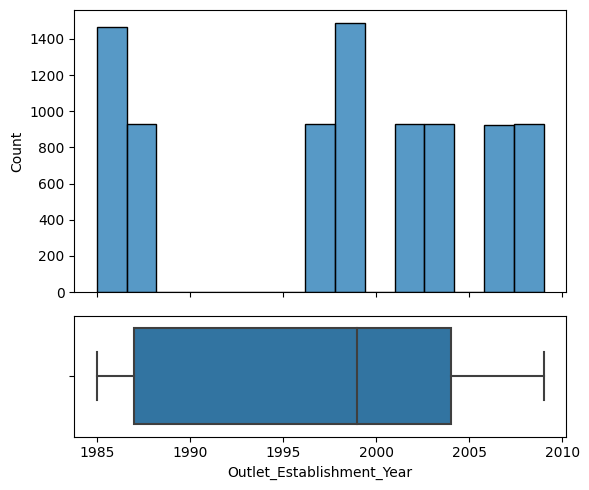

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_num(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - n/a

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes established year would not have much impact on the target



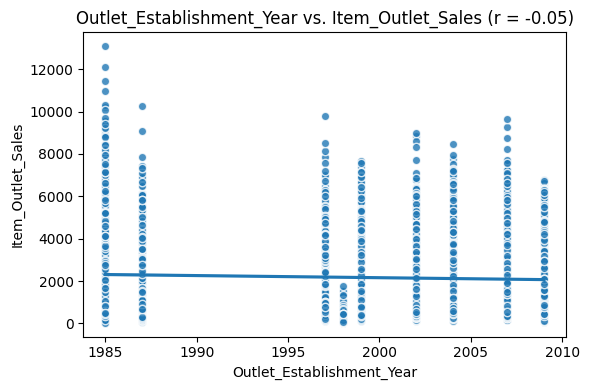

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_num_to_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no year should not have anything to do with the target
  - Does this feature appear to be a predictor of the target?
    - no it appears to be pretty flat with no correlation.

___

### 'Outlet_Size' Feature

- The size of the store in terms of ground area covered

  

In [109]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
sales_df[feature].dtype

dtype('O')

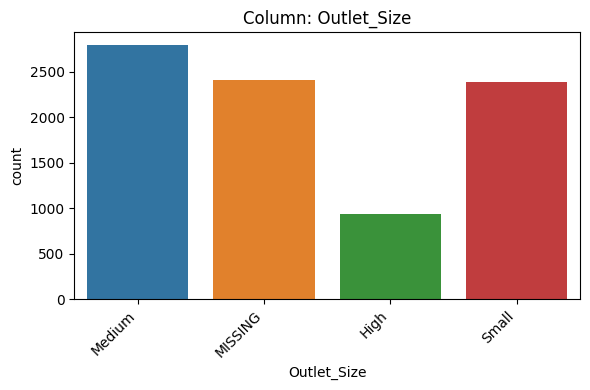

 - NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times   (32.77%)
'Outlet_Size' is not a constant or quasi-contant.


In [110]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%), impute with missing

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - low

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no, we need to see which outlets play a crucial role in the determination of sales


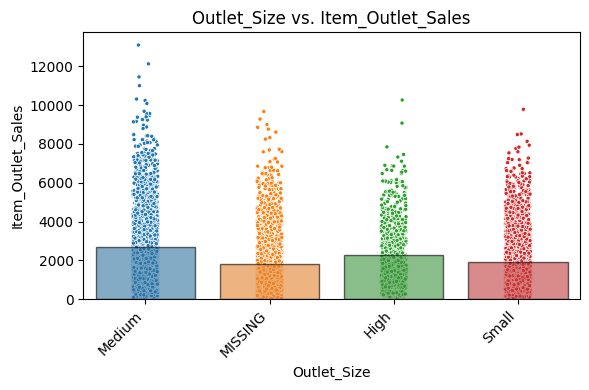

In [111]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

In [114]:
sales_df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, we want to see which outlets have the most impact on sales
  - Does this feature appear to be a predictor of the target?
    - maybe, there is higher sales in the medium outlet, but that could just be there is more medium class stores
___

### 'Outlet_Location_Type' Feature

- The type of area in which the store is located

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
sales_df[feature].dtype

dtype('O')

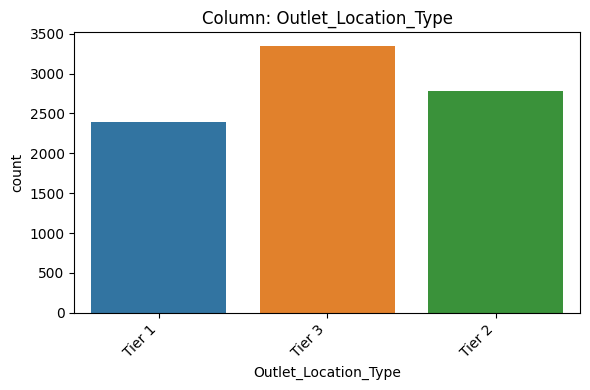

 - NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times   (39.31%)
'Outlet_Location_Type' is not a constant or quasi-contant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - low, it is not above 10.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


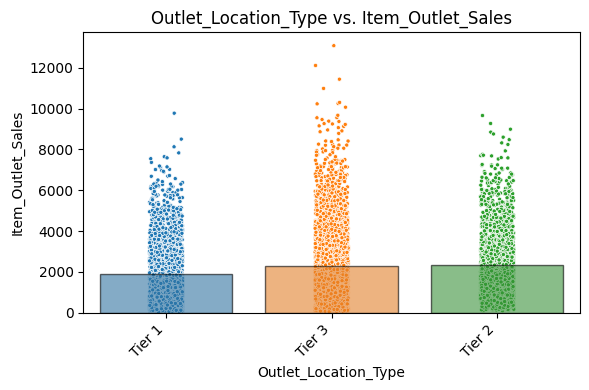

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

In [ ]:
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, it would be expected higher tiers to be in higher sales areas
  - Does this feature appear to be a predictor of the target?
    - yes, however it appears there are more sales in tier 3, possibly due to the fact we have more Tier 3 stores in the dataset.

___

### 'Outlet_Type' Feature

- Whether the outlet is a grocery store or some sort of supermarket

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
sales_df[feature].dtype

dtype('O')

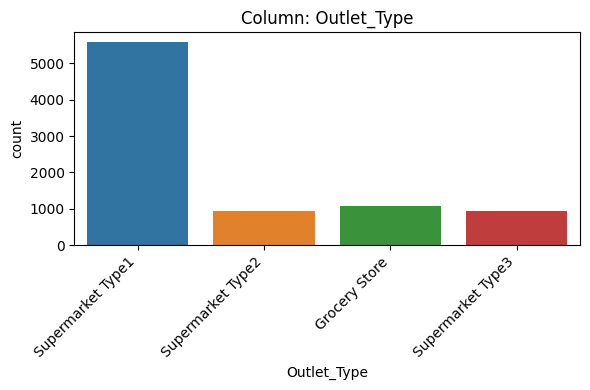

 - NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times   (65.43%)
'Outlet_Type' is not a constant or quasi-contant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_cat(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - catergorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - low, it is not above 10.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



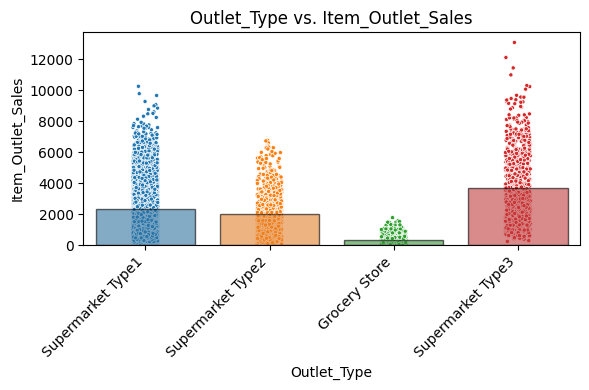

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_cat_vs_target(sales_df, x=feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, it would be expected that certain store types would produce higher sales
  - Does this feature appear to be a predictor of the target?
    - yes, there is varability between the different types.

___

### 'Item_Outlet_Sales' Feature

- Sales of the product in the particular store. This is the target variable to be predicted.

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
sales_df[feature].dtype

dtype('float64')

 - NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times   (0.2%)
'Item_Outlet_Sales' is not a constant or quasi-contant.


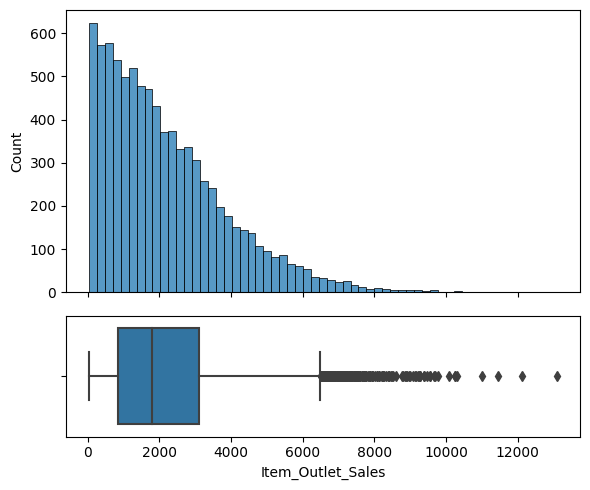

In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_num(sales_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - n/a

5. Would we know this BEFORE the target is determined?
  - Yes this is the target

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes this is the target column



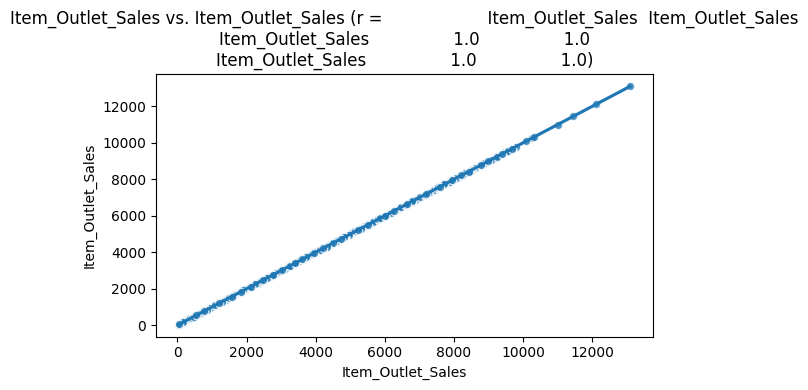

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_num_to_target(sales_df, x=feature);